In [1]:
import os
from torchvision.transforms import ToTensor, Resize, Normalize, Compose, Lambda, RandomHorizontalFlip, RandomRotation, ColorJitter
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
import torch
import torch.nn.functional as F

augmentation_transform = Compose([
    RandomHorizontalFlip(p=0.5),            # Random horizontal flip with probability 0.5
    RandomRotation(degrees=10),              # Random rotation by 10 degrees
    ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1)  # Color jitter
])

image_transform = Compose([
    ToTensor(),
    Normalize((0),(1)),
    augmentation_transform
])

label_transform = Compose([
    #ToTensor(),
    Lambda(lambda label: F.one_hot(torch.tensor(label), 10).float())
]) #Assuming you have 26 classes

transform = lambda image, label: (image_transform(image), label_transform(label))

class CustomDataset(Dataset):
    def __init__(self, root_dir, resize=(240,240), transform=transform):
        self.root_dir = root_dir
        self.resize=resize
        self.transform=transform
        self.classes = sorted(os.listdir(root_dir))
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}
        self.images = self.load_images()

    def load_images(self):
        images = []
        for cls in self.classes:
            class_path = os.path.join(self.root_dir, cls)
            image_files = os.listdir(class_path) # Limit to num_images per class
            for filename in image_files:
                images.append((os.path.join(class_path, filename), cls))
        return images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image_path, label = self.images[idx]
        label= self.class_to_idx[label]
        #print(label)
        image = Image.open(image_path).convert('RGB')
        if self.resize:
            image=Resize(self.resize)(image)
        if self.transform:
            image,label= transform(image, label)
        #print(label)
        return image, label


# Create the dataset
dataset = CustomDataset(root_dir = "T:/my first project/archive/American", resize=(240,240), transform=transform)

test_loader = DataLoader(dataset, batch_size=32, shuffle=True)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'T:/my first project/archive/American'

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from torchvision.transforms import ToTensor, Resize, Normalize, Compose, Lambda, RandomHorizontalFlip, RandomRotation, ColorJitter
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
import torch
import torch.nn.functional as F
from collections import defaultdict

augmentation_transform = Compose([
    RandomHorizontalFlip(p=0.5),            # Random horizontal flip with probability 0.5
    RandomRotation(degrees=10),              # Random rotation by 10 degrees
    #ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1)  # Color jitter
])

image_transform = Compose([
    ToTensor(),
    Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),
    augmentation_transform
])

label_transform = Compose([
    #ToTensor(),
    Lambda(lambda label: F.one_hot(torch.tensor(label), 10).float())
]) #Assuming you have 26 classes

transform = lambda image, label: (image_transform(image), label_transform(label))

class CustomDataset(Dataset):
    def __init__(self, root_dir, resize=(720,720), transform=transform):
        self.root_dir = root_dir
        self.resize=resize
        self.transform=transform
        self.classes = sorted(os.listdir(root_dir))
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}
        self.images = self.load_images()

    def load_images(self):
        images = []
        for cls in self.classes:
            class_path = os.path.join(self.root_dir, cls)
            image_files = os.listdir(class_path)
            for filename in image_files:
                images.append((os.path.join(class_path, filename), cls))
        return images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image_path, label = self.images[idx]
        label= self.class_to_idx[label]
        #print(label)
        image = Image.open(image_path).convert('RGB')
        if self.resize:
            image=Resize(self.resize)(image)
        if self.transform:
            image,label= transform(image, label)
        #print(label)
        return image, label


# Create the dataset
dataset = CustomDataset(root_dir = "/content/drive/MyDrive/My first project/Archive/real dataset", resize=(720,720), transform=transform)

# Determine the sizes for training and testing datasets
train_size = int(0.8 * len(dataset))  # 80% for training
test_size = len(dataset) - train_size  # Remaining 20% for testing

# Split the dataset into training and testing sets
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoaders for training and testing
new_train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
new_test_loader = DataLoader(test_dataset, batch_size=4, shuffle=True)

In [ ]:
print(len(dataset))

18603


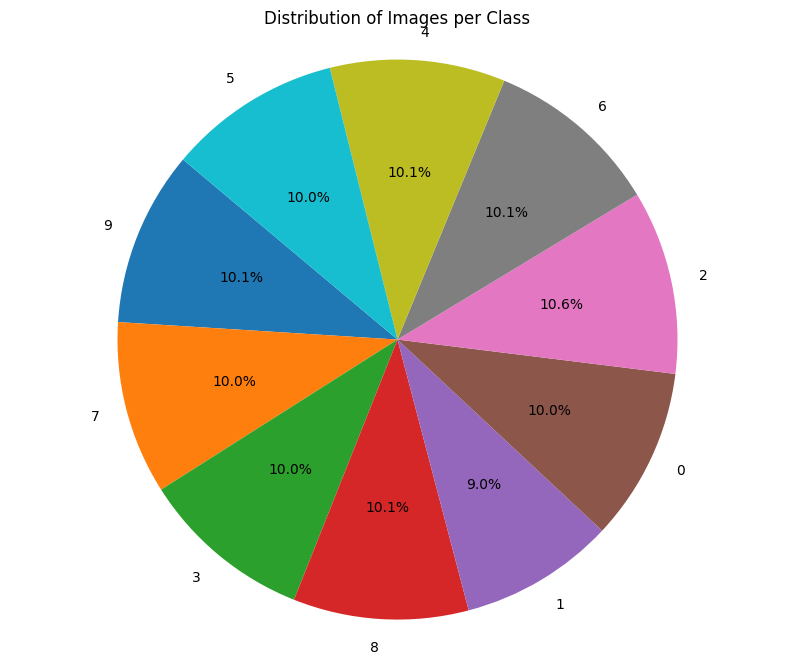

In [ ]:
import os
import matplotlib.pyplot as plt

# Define the root directory of your dataset
root_dir = "/content/drive/MyDrive/My first project/Archive/real dataset"

# Get a list of all subdirectories (classes) in the root directory
classes = os.listdir(root_dir)

# Initialize a dictionary to store the count of images per class
class_counts = {}

# Iterate through each class directory to count the number of images
for cls in classes:
    class_path = os.path.join(root_dir, cls)
    # Count the number of files (images) in each class directory
    num_images = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
    class_counts[cls] = num_images

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Images per Class')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
for images, labels in new_train_loader:
    # Check if labels are tensors
    if not isinstance(labels, torch.Tensor):
        print("Labels are not tensors.")
        continue  # Skip this iteration

    # Check the shape of labels (one-hot encoded labels have shape (batch_size, num_classes))
    if len(labels.shape) == 2:
        print("Labels might be one-hot encoded. Shape:", labels.shape)
        print(labels)
    else:
        print("Labels are not one-hot encoded. Shape:", labels.shape)
    break  # Only need to check one batch


Labels might be one-hot encoded. Shape: torch.Size([4, 10])
tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])


Feature batch shape: torch.Size([4, 3, 720, 720])
Labels batch shape: torch.Size([4, 10])
torch.FloatTensor
torch.FloatTensor


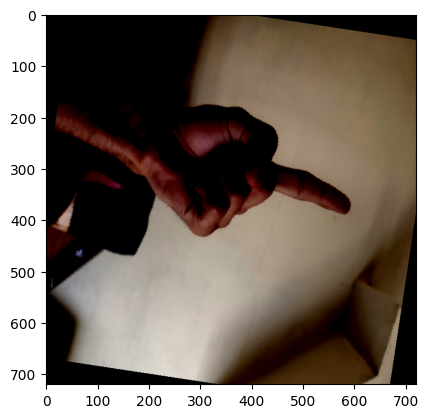

Label: tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])


In [ ]:
import matplotlib.pyplot as plt

# Assuming train_loader is your DataLoader
train_features, train_labels = next(iter(new_train_loader))

# Display the shape of the feature batch and label batch
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
print(train_features.type())
print(train_labels.type())

# Assuming the first image in the batch is a grayscale image
# You may need to modify this depending on your dataset
img = train_features[0].permute(1,2,0)

# Assuming the label is a single integer representing the class index
label = train_labels[0]

# Display the image
plt.imshow(img)
plt.show()

# Display the label
print(f"Label: {label}")


In [ ]:
#for idx, (transformed_image, transformed_label) in enumerate(new_train_loader):
train_features, train_labels = next(iter(new_train_loader))
print('yes: ',train_features.type())
print(train_labels.type())


yes:  torch.FloatTensor
torch.FloatTensor


In [3]:
import torch
device = torch.device("cuda:0" )
print(device)
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))

cuda:0
1
0
NVIDIA GeForce GTX 1650


In [ ]:
from torch import nn
import torch.optim as optim
import torch.nn.functional as F
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(128*90*90, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, input):
        output = F.relu(self.conv1(input))
        output = self.pool(output)
        output = F.relu(self.conv2(output))
        output = self.pool(output)
        output = F.relu(self.conv3(output))
        output = self.pool(output)
        #print(output.shape)

        output = output.reshape(-1,128*90*90)
        output = F.relu(self.fc1(output))
        output = self.fc2(output)


        return output
device = torch.device("cuda:0")
model = Network().to(device)
print(model)

Network(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1036800, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)


In [ ]:
criterion=nn.CrossEntropyLoss()

In [ ]:
optimizer=optim.Adam(model.parameters() , lr=0.001)

In [ ]:
checkpoint_path = '/content/drive/MyDrive/checkpoints/checkpoint.pth'

# Function to save the model checkpoint
def save_checkpoint(state, filename):
    torch.save(state, filename)

# Load checkpoint if exists
start_epoch = 0
if os.path.isfile(checkpoint_path):
    checkpoint = torch.load(checkpoint_path)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    start_epoch = checkpoint['epoch'] + 1
    print(f"Checkpoint loaded, resuming training from epoch {start_epoch}")

num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for data in new_train_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)

        # Assuming using CrossEntropyLoss
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Accuracy calculation
        _, predicted = torch.max(outputs, 1)

        correct += (predicted == labels.argmax(dim=1)).sum().item()
        total += labels.size(0)
    _accuracy = 100 * correct / total
    epoch_loss = running_loss / len(new_train_loader)
    print(f'Training - Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {_accuracy:.2f}%,  Correct: {correct},total: {total}')

    # Save checkpoint at the end of each epoch
    checkpoint_state = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': epoch_loss
    }
    save_checkpoint(checkpoint_state, checkpoint_path)

    # Validation
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    #with torch.no_grad():
    for images, labels in new_test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            # Accuracy calculation
            _, predicted = torch.max(outputs, 1)

            correct += (predicted == labels.argmax(dim=1)).sum().item()
            total += labels.size(0)

    val_accuracy = 100 * correct / total
    print(f'Validation - Epoch [{epoch+1}/{num_epochs}], Accuracy: {val_accuracy:.2f}%,  Correct: {correct},total: {total}')


# Save the trained model
torch.save(model.state_dict(), 'num_model.pth')
torch.save(model.state_dict(), 'drive/app/model.pth')

In [ ]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
import torch
from torchvision.transforms import ToTensor, Resize, Normalize, Compose
from PIL import Image

# Load the trained model
device = torch.device("cuda:0")
model = Network().to(device)
model.load_state_dict(torch.load('num_model.pth'))

# Ensure model is in evaluation mode
model.eval()

# Define image preprocessing transforms
image_transform = Compose([
    Resize((350, 350)),
    ToTensor(),
    Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Ensure this matches the training normalization
])

def predict_image(image_path, model, dataset):
    image = Image.open(image_path).convert('RGB')
    image = image_transform(image)
    image = image.unsqueeze(0)  # Add batch dimension
    #print(image.shape)

    with torch.no_grad():  # Ensure no gradients are computed during inference
        output = model(image.to(device))

    _, predicted = torch.max(output, 1)
    predicted_class_idx = predicted.item()
    predicted_class_name = dataset.classes[predicted_class_idx]
    return predicted_class_name

# Example usage
image_path = "C:/Users/tusha/Downloads/4c47049f8e3f307f94b9a977995179ac8444e036_large.jpg"
predicted_class = predict_image(image_path, model, dataset)
print("Predicted class:", predicted_class)


Predicted class: 0


In [ ]:
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Load the trained model
model = Network()
model.load_state_dict(torch.load('new_cnn_model.pth'))
model = model.to(device)
model.eval()

true_labels = []
predicted_labels = []

# Iterate over the test dataset
for images, labels in new_test_loader:
    images = images.to(device)
    labels = labels.to(device)

    # Perform forward pass to get predictions
    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

    # Append true and predicted labels to the lists
    true_labels.extend(torch.argmax(labels, dim=1).cpu().numpy())
    predicted_labels.extend(predicted.cpu().numpy())

# Convert lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Compute accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy}")

# Compute other evaluation metrics
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)


# Display or save results as needed


Accuracy: 0.9425368150985837
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       570
           1       0.97      1.00      0.99       334
           2       0.99      0.99      0.99       353
           3       0.98      0.99      0.99       301
           4       0.99      0.99      0.99       603
           5       1.00      0.99      0.99       591
           6       0.96      1.00      0.98       635
           7       1.00      0.99      1.00       636
           8       0.99      1.00      0.99       631
           9       0.99      0.99      0.99       607
          10       0.89      0.87      0.88      1276
          11       0.83      0.98      0.90      1168
          12       0.96      0.97      0.97      1201
          13       0.93      0.89      0.91      1207
          14       0.71      0.68      0.69       599
          15       0.95      0.87      0.91      1193
          16       0.95      

In [ ]:
import cv2
import torch
import mediapipe as mp
import numpy as np

# Load the trained model
device = torch.device("cuda:0")
model = Network().to(device)
model.load_state_dict(torch.load('new_cnn_model.pth'))

# Define image preprocessing transforms
def preprocess_image(image):
    # Flip the input image horizontally
    flipped_image = cv2.flip(image, 1)
    # Resize to match the input size of the model
    resized_image = cv2.resize(flipped_image, (240, 240))
    # Convert to tensor and normalize
    tensor_image = resized_image.astype(float) / 255.0  # Normalize to [0, 1]
    tensor_image = torch.tensor(tensor_image).permute(2, 0, 1) # Channels-first
    return tensor_image

# Initialize MediaPipe Hands model
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

# Initialize MediaPipe Drawing module for drawing landmarks
#mp_drawing = mp.solutions.drawing_utils

# Open the webcam
cap = cv2.VideoCapture(0)

while cap.isOpened():
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Convert the frame to RGB (MediaPipe requires RGB input)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Perform hand detection
    results = hands.process(rgb_frame)

    if results.multi_hand_landmarks:
        # Extract hand landmarks
        for hand_landmarks in results.multi_hand_landmarks:
            # Draw hand landmarks on the frame
            mp.solutions.drawing_utils.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Extract bounding box of the hand
            # Extract bounding box of the hand
            landmark_points = np.array([(lm.x, lm.y) for lm in hand_landmarks.landmark], dtype=np.float32)
            bbox = cv2.boundingRect(landmark_points)


            if bbox[2] > 0 and bbox[3] > 0:  # Check if bounding box dimensions are valid
                # Extract hand region
                hand_region = frame[bbox[1]:bbox[1]+bbox[3], bbox[0]:bbox[0]+bbox[2]]

                # Preprocess the hand region
                preprocessed_hand = preprocess_image(hand_region)
                preprocessed_hand = preprocessed_hand.float().to(device)
                # Perform inference on the hand region
                output = model(preprocessed_hand.unsqueeze(0))  # Add batch dimension

                # Process the output to obtain predictions
                _, predicted = torch.max(output, 1)
                predicted_class_idx = predicted.item()
                predicted_class_name = dataset.classes[predicted_class_idx]
                #print(predicted_class_name)
                # Display the prediction# Display the prediction at the top left corner
                cv2.putText(frame, predicted_class_name, (30, 40), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 2)


    # Display the frame
    cv2.imshow('Frame', frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture
cap.release()
cv2.destroyAllWindows()


In [ ]:
import cv2
import torch
import mediapipe as mp
import numpy as np
from torchvision.transforms import Compose, Resize, ToTensor, Normalize

# Define image preprocessing transforms
preprocess = Compose([
    Resize((350, 350)),
    ToTensor(),
    Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

def preprocess_image(image):
    # Resize to match the input size of the model
    resized_image = cv2.resize(image, (350, 350))
    # Convert to tensor and normalize
    tensor_image = torch.tensor(resized_image).permute(2, 0, 1).float() / 255.0
    tensor_image = Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))(tensor_image)
    return tensor_image

# Load the trained model
device = torch.device("cuda:0")
model = Network().to(device)
model.load_state_dict(torch.load('num_model.pth'))
model.eval()  # Set the model to evaluation mode

# Initialize MediaPipe Hands model
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

# Open the webcam
cap = cv2.VideoCapture(0)
# Define padding value
padding = 20

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(rgb_frame)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp.solutions.drawing_utils.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            landmark_points = np.array([(lm.x * frame.shape[1], lm.y * frame.shape[0]) for lm in hand_landmarks.landmark], dtype=np.float32)
            bbox = cv2.boundingRect(landmark_points)

            # Ensure bounding box coordinates are within frame dimensions
            x, y, w, h = bbox
            x = max(0, x - padding)
            y = max(0, y - padding)
            w = min(frame.shape[1] - x, w + 2 * padding)
            h = min(frame.shape[0] - y, h + 2 * padding)

            if x >= 0 and y >= 0 and x + w <= frame.shape[1] and y + h <= frame.shape[0]:
                hand_region = frame[y:y+h, x:x+w]

                # Check if hand region has valid dimensions
                if hand_region.shape[0] > 0 and hand_region.shape[1] > 0:
                    cv2.imshow('Hand Region', hand_region)

                    preprocessed_hand = preprocess_image(hand_region)
                    preprocessed_hand = preprocessed_hand.unsqueeze(0).to(device)

                    with torch.no_grad():
                        output = model(preprocessed_hand)
                        probabilities = F.softmax(output, dim=1)
                        _, predicted = torch.max(output, 1)
                        predicted_class_idx = predicted.item()
                        predicted_class_name = dataset.classes[predicted_class_idx]

                        print(f"Logits: {output}")
                        print(f"Probabilities: {probabilities}")
                        print(f"Predicted class index: {predicted_class_idx}, Predicted class name: {predicted_class_name}")

                        cv2.putText(frame, predicted_class_name, (30, 40), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 2)

    cv2.imshow('Frame', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Logits: tensor([[-23.8404,  -8.9856, -31.4389, -21.7283, -28.4572,  -9.7517, -32.2703,
          -2.4214, -13.1238,   2.7826]], device='cuda:0')
Probabilities: tensor([[2.7253e-12, 7.7044e-06, 1.3659e-15, 2.2525e-11, 2.6938e-14, 3.5812e-06,
         5.9473e-16, 5.4646e-03, 1.2291e-07, 9.9452e-01]], device='cuda:0')
Predicted class index: 9, Predicted class name: 9
Logits: tensor([[-40.4999, -10.1206, -25.8444, -14.6474, -31.2912,  -6.6361, -32.3441,
          -0.3480, -46.0718, -12.7327]], device='cuda:0')
Probabilities: tensor([[3.6427e-18, 5.6883e-05, 8.4371e-12, 6.1516e-07, 3.6367e-14, 1.8548e-03,
         1.2688e-14, 9.9808e-01, 1.3854e-20, 4.1741e-06]], device='cuda:0')
Predicted class index: 7, Predicted class name: 7
Logits: tensor([[-40.5557, -31.6265, -29.8553, -20.2211, -33.9416,   6.1048, -36.4972,
           3.8163, -44.5416,  -5.8090]], device='cuda:0')
Probabilities: tensor([[4.9392e-21, 3.7287e-17, 2.1916e-16, 3.3486e-12, 3.6820e-18, 9.0792e-01,
         2.8590e-19, 9.20

In [ ]:
cap.release()
cv2.destroyAllWindows()

cnn model

In [ ]:
import os
from torchvision.transforms import ToTensor, Resize, Normalize, Compose, Lambda, RandomHorizontalFlip, RandomRotation, ColorJitter
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
import torch
import torch.nn.functional as F

augmentation_transform = Compose([
    RandomHorizontalFlip(p=0.5),            # Random horizontal flip with probability 0.5
    RandomRotation(degrees=10),              # Random rotation by 10 degrees
    ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1)  # Color jitter
])

image_transform = Compose([
    ToTensor(),
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    augmentation_transform
])

label_transform = Compose([
    #ToTensor(),
    Lambda(lambda label: F.one_hot(torch.tensor(label), 10).float())
]) #Assuming you have 26 classes

transform = lambda image, label: (image_transform(image), label_transform(label))

class CustomDataset(Dataset):
    def __init__(self, root_dir, resize=(240,240), transform=transform):
        self.root_dir = root_dir
        self.resize=resize
        self.transform=transform
        self.classes = sorted(os.listdir(root_dir))
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}
        self.images = self.load_images()

    def load_images(self):
        images = []
        for cls in self.classes:
            class_path = os.path.join(self.root_dir, cls)
            image_files = os.listdir(class_path)
            for filename in image_files:
                images.append((os.path.join(class_path, filename), cls))
        return images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image_path, label = self.images[idx]
        label= self.class_to_idx[label]
        #print(label)
        image = Image.open(image_path).convert('RGB')
        if self.resize:
            image=Resize(self.resize)(image)
        if self.transform:
            image,label= transform(image, label)
        #print(label)
        return image, label


# Create the dataset
dataset = CustomDataset(root_dir = "T:/my first project/real dataset", resize=(240,240), transform=transform)

# Determine the sizes for training and testing datasets
train_size = int(0.8 * len(dataset))  # 80% for training
test_size = len(dataset) - train_size  # Remaining 20% for testing

# Split the dataset into training and testing sets
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoaders for training and testing
new_train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
new_test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)


In [ ]:
num_epochs = 8
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for data in new_train_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)

        # Assuming using CrossEntropyLoss
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Accuracy calculation
        _, predicted = torch.max(outputs, 1)

        correct += (predicted == labels.argmax(dim=1)).sum().item()
        total += labels.size(0)
    _accuracy = 100 * correct / total
    epoch_loss = running_loss / len(new_train_loader)
    print(f'Training - Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {_accuracy:.2f}%,  Correct: {correct},total: {total}')

    # Validation
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    #with torch.no_grad():
    for images, labels in new_test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            # Accuracy calculation
            _, predicted = torch.max(outputs, 1)

            correct += (predicted == labels.argmax(dim=1)).sum().item()
            total += labels.size(0)

    val_accuracy = 100 * correct / total
    print(f'Validation - Epoch [{epoch+1}/{num_epochs}], Accuracy: {val_accuracy:.2f}%,  Correct: {correct},total: {total}')


# Save the trained model
torch.save(model.state_dict(), 'sample_model.pth')


Training - Epoch [1/8], Loss: 2.5902, Accuracy: 18.68%,  Correct: 159,total: 851
Validation - Epoch [1/8], Accuracy: 23.94%,  Correct: 51,total: 213
Training - Epoch [2/8], Loss: 1.6087, Accuracy: 43.48%,  Correct: 370,total: 851
Validation - Epoch [2/8], Accuracy: 48.83%,  Correct: 104,total: 213
Training - Epoch [3/8], Loss: 0.7875, Accuracy: 73.44%,  Correct: 625,total: 851
Validation - Epoch [3/8], Accuracy: 84.98%,  Correct: 181,total: 213
Training - Epoch [4/8], Loss: 0.2470, Accuracy: 92.71%,  Correct: 789,total: 851
Validation - Epoch [4/8], Accuracy: 91.55%,  Correct: 195,total: 213
Training - Epoch [5/8], Loss: 0.1849, Accuracy: 94.01%,  Correct: 800,total: 851
Validation - Epoch [5/8], Accuracy: 94.37%,  Correct: 201,total: 213
Training - Epoch [6/8], Loss: 0.1005, Accuracy: 96.83%,  Correct: 824,total: 851
Validation - Epoch [6/8], Accuracy: 100.00%,  Correct: 213,total: 213
Training - Epoch [7/8], Loss: 0.0721, Accuracy: 98.12%,  Correct: 835,total: 851
Validation - Epoch 

In [ ]:
from torch import nn
import torch.optim as optim
import torch.nn.functional as F
class Network1(nn.Module):
    def __init__(self):
        super(Network1, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(128*28*28, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, input):
        output = F.relu(self.conv1(input))
        output = self.pool(output)
        output = F.relu(self.conv2(output))
        output = self.pool(output)
        output = F.relu(self.conv3(output))
        output = self.pool(output)

        output = output.reshape(-1,128*28*28 )
        output = F.relu(self.fc1(output))
        output = self.fc2(output)


        return output
device = torch.device("cuda:0")
model = Network1().to(device)
print(model)

Network1(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=100352, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)


In [ ]:
import torch
from torchvision.transforms import ToTensor, Resize, Normalize, Compose
from PIL import Image

# Load the trained model
device = torch.device("cuda:0")
model = Network1()
model.load_state_dict(torch.load('sample_model.pth'))

# Define image preprocessing transforms
image_transform = Compose([
    Resize((240, 240)),
    ToTensor(),
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Assuming you used this normalization during training
])

def predict_image(image_path, model, dataset):
    image = Image.open(image_path).convert('RGB')
    image = image_transform(image)
    image = image.unsqueeze(0)  # Add batch dimension


    #with torch.no_grad():
    output = model(image)
    print(output)
    _, predicted = torch.max(output, 1)
    predicted_class_idx = predicted.item()
    print(predicted_class_idx)
    predicted_class_name = dataset.classes[predicted_class_idx]
    return predicted_class_name

# Example usage
image_path = "T:/my first project/real dataset/0/IMG_20240417_145956 - Copy (2).jpg"
predicted_class = predict_image(image_path, model, dataset)
print("Predicted class:", predicted_class)


tensor([[ 21.8294,  14.6097,   2.9005,  -6.0602, -13.0014,  -0.5504,   2.2734,
          -4.1410,  -6.1879,  -0.6298]], grad_fn=<AddmmBackward0>)
0
Predicted class: 0


In [ ]:
import cv2
import torch
import mediapipe as mp
import numpy as np

# Load the trained model
device = torch.device("cuda:0")
model = Network1().to(device)
model.load_state_dict(torch.load('sample_model.pth'))

# Define image preprocessing transforms
def preprocess_image(image):
    # Flip the input image horizontally
    flipped_image = cv2.flip(image, 1)
    # Resize to match the input size of the model
    resized_image = cv2.resize(flipped_image, (240, 240))
    # Convert to tensor and normalize
    tensor_image = resized_image.astype(float) / 255.0  # Normalize to [0, 1]
    tensor_image = torch.tensor(tensor_image).permute(2, 0, 1) # Channels-first
    return tensor_image

# Initialize MediaPipe Hands model
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

# Initialize MediaPipe Drawing module for drawing landmarks
#mp_drawing = mp.solutions.drawing_utils

# Open the webcam
cap = cv2.VideoCapture(0)

while cap.isOpened():
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Convert the frame to RGB (MediaPipe requires RGB input)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Perform hand detection
    results = hands.process(rgb_frame)

    if results.multi_hand_landmarks:
        # Extract hand landmarks
        for hand_landmarks in results.multi_hand_landmarks:
            # Draw hand landmarks on the frame
            mp.solutions.drawing_utils.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Extract bounding box of the hand
            # Extract bounding box of the hand
            landmark_points = np.array([(lm.x, lm.y) for lm in hand_landmarks.landmark], dtype=np.float32)
            bbox = cv2.boundingRect(landmark_points)


            if bbox[2] > 0 and bbox[3] > 0:  # Check if bounding box dimensions are valid
                # Extract hand region
                hand_region = frame[bbox[1]:bbox[1]+bbox[3], bbox[0]:bbox[0]+bbox[2]]

                # Preprocess the hand region
                preprocessed_hand = preprocess_image(hand_region)
                preprocessed_hand = preprocessed_hand.float().to(device)
                # Perform inference on the hand region
                output = model(preprocessed_hand.unsqueeze(0))  # Add batch dimension

                # Process the output to obtain predictions
                _, predicted = torch.max(output, 1)
                predicted_class_idx = predicted.item()
                predicted_class_name = dataset.classes[predicted_class_idx]
                #print(predicted_class_name)
                # Display the prediction# Display the prediction at the top left corner
                cv2.putText(frame, predicted_class_name, (30, 40), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 2)


    # Display the frame
    cv2.imshow('Frame', frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture
cap.release()
cv2.destroyAllWindows()


NameError: name 'Network1' is not defined

In [ ]:
# Print class names and their corresponding indices
print("Class Index Mapping:")
for cls, idx in dataset.class_to_idx.items():
    print(f"Class: {cls}, Index: {idx}")


Class Index Mapping:
Class: 0, Index: 0
Class: 1, Index: 1
Class: 2, Index: 2
Class: 3, Index: 3
Class: 4, Index: 4
Class: 5, Index: 5
Class: 6, Index: 6
Class: 7, Index: 7
Class: 8, Index: 8
Class: 9, Index: 9
Class: a, Index: 10
Class: b, Index: 11
Class: c, Index: 12
Class: d, Index: 13
Class: e, Index: 14
Class: f, Index: 15
Class: g, Index: 16
Class: h, Index: 17
Class: i, Index: 18
Class: j, Index: 19
Class: k, Index: 20
Class: l, Index: 21
Class: m, Index: 22
Class: n, Index: 23
Class: o, Index: 24
Class: p, Index: 25
Class: q, Index: 26
Class: r, Index: 27
Class: s, Index: 28
Class: t, Index: 29
Class: u, Index: 30
Class: v, Index: 31
Class: w, Index: 32
Class: x, Index: 33
Class: y, Index: 34
Class: z, Index: 35


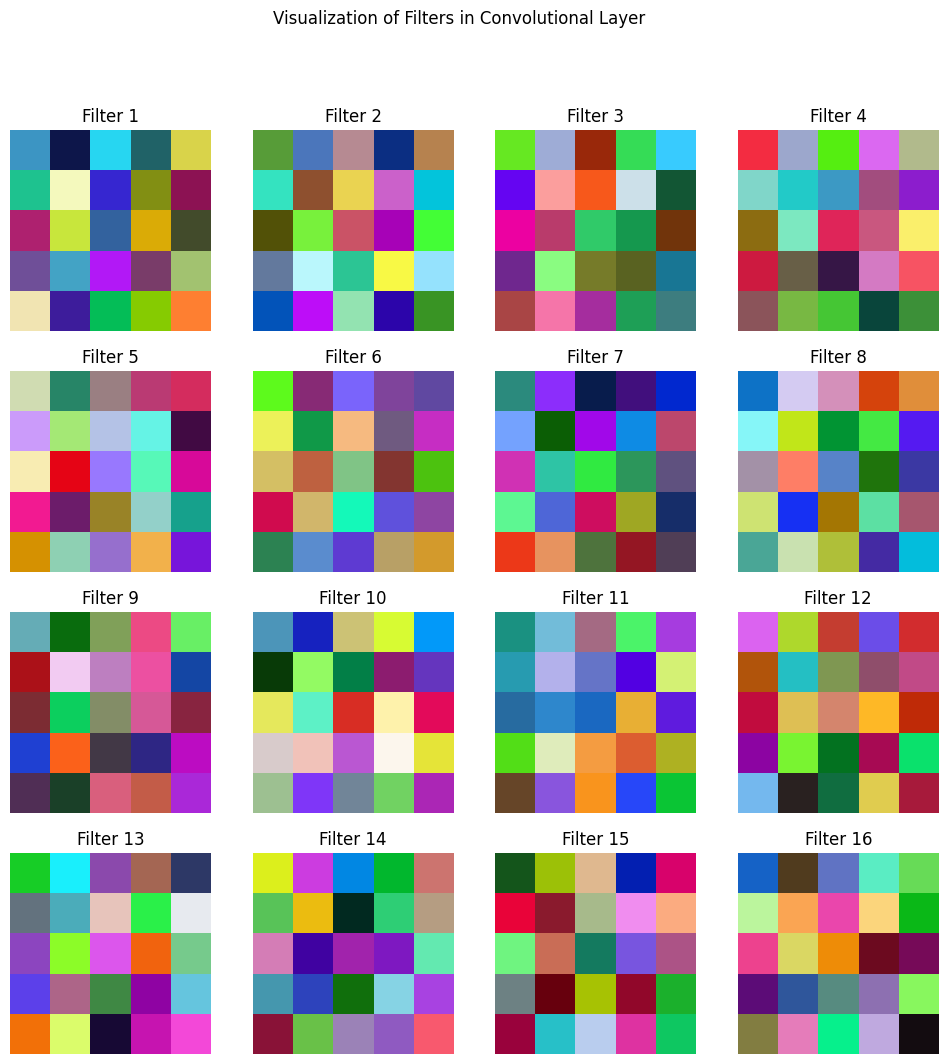

In [ ]:
import torch
import matplotlib.pyplot as plt

def visualize_filters(model, layer_index, num_filters=16):
    # Get the weights of the specified layer
    layer_weights = model.conv1.weight.data.cpu()  # Assuming the first layer is named 'conv1'

    # Normalize the weights to [0, 1]
    layer_weights -= layer_weights.min()
    layer_weights /= layer_weights.max()

    # Plot the filters
    fig, axs = plt.subplots(num_filters // 4, 4, figsize=(12, 12))
    fig.suptitle('Visualization of Filters in Convolutional Layer')

    for i in range(num_filters):
        ax = axs[i // 4, i % 4]
        filter_img = layer_weights[i].permute(1, 2, 0).numpy()  # Convert from tensor to numpy array
        ax.imshow(filter_img)
        ax.axis('off')
        ax.set_title(f'Filter {i+1}')

    plt.show()

# Assuming 'model' is your CNN model
visualize_filters(model, layer_index=0, num_filters=16)


In [ ]:
device = torch.device("cuda:0")
model = Network1().to(device)
model.load_state_dict(torch.load('sample_model.pth'))
model.eval()
val_loss = 0.0
correct = 0
total = 0

    #with torch.no_grad():
for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            # Accuracy calculation
            _, predicted = torch.max(outputs, 1)

            correct += (predicted == labels.argmax(dim=1)).sum().item()
            total += labels.size(0)

val_accuracy = 100 * correct / total
print(f', Accuracy: {val_accuracy:.2f}%,  Correct: {correct},total: {total}')

, Accuracy: 6.78%,  Correct: 1139,total: 16800
